In [137]:
# importing all the required packages which include Tensorflow and Keras


import tensorflow as tf
import keras

In [138]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [139]:
# selecting the classifier there are two option either go with sequential or functional
classifier = Sequential()


In [140]:
#adding convolutional and Maxpooling layer with the activation center relu
#input shape we are taking as 64*64 with RGB
#we are having 32 different filetrs and sliding size is 3*3

classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [141]:
#maxpooling is having slide size 2*2
classifier.add(MaxPooling2D(pool_size = (2, 2)))


In [142]:
#adding multiple layers for multilayer feed back neural network
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


In [143]:
#converting the extracted features in one dimensional array
classifier.add(Flatten())


In [144]:
#densing the feature to make classified clustering
classifier.add(Dense(activation = 'relu',units=128))
classifier.add(Dense(activation = 'sigmoid',units=1))


In [145]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [146]:
#importing the images in training and testing objects with some preprocesing 
from keras.preprocessing.image import ImageDataGenerator


In [147]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [148]:
test_datagen = ImageDataGenerator(rescale = 1./255)


In [149]:
import os 
os.getcwd()
os.chdir('/home/telraswa/Desktop/Swapnil/Pallavi/Deep_Learning/CNN')
print(os.getcwd())

/home/telraswa/Desktop/Swapnil/Pallavi/Deep_Learning/CNN


In [150]:
training_set = train_datagen.flow_from_directory('/home/telraswa/Desktop/Swapnil/Pallavi/Deep_Learning/CNN/Train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 539 images belonging to 2 classes.


In [151]:
test_set = test_datagen.flow_from_directory('/home/telraswa/Desktop/Swapnil/Pallavi/Deep_Learning/CNN/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 44 images belonging to 2 classes.


In [152]:
# setting some parameters to feed back neural network 

classifier.fit_generator(training_set, steps_per_epoch=None, epochs=10, verbose=1, callbacks=None, validation_data=test_set, validation_steps=None, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0)
 

Epoch 1/10
17/17 [==============================] - 4s 246ms/step - loss: 0.5421 - acc: 0.7955 - val_loss: 1.5664 - val_acc: 0.5000
Epoch 2/10
17/17 [==============================] - 4s 235ms/step - loss: 0.5423 - acc: 0.8026 - val_loss: 1.1679 - val_acc: 0.5000
Epoch 3/10
17/17 [==============================] - 4s 228ms/step - loss: 0.5020 - acc: 0.8013 - val_loss: 0.9968 - val_acc: 0.5000
Epoch 4/10
17/17 [==============================] - 4s 231ms/step - loss: 0.4951 - acc: 0.8016 - val_loss: 1.1710 - val_acc: 0.5000
Epoch 5/10
17/17 [==============================] - 4s 232ms/step - loss: 0.4881 - acc: 0.8022 - val_loss: 1.1218 - val_acc: 0.5000
Epoch 6/10
17/17 [==============================] - 4s 233ms/step - loss: 0.4731 - acc: 0.8010 - val_loss: 1.1291 - val_acc: 0.5000
Epoch 7/10
17/17 [==============================] - 4s 234ms/step - loss: 0.4731 - acc: 0.8022 - val_loss: 1.1073 - val_acc: 0.5000
Epoch 8/10
17/17 [==============================] - 4s 231ms/step - loss: 0.

In [153]:
#loading validation image
import numpy as np
from keras.preprocessing import image

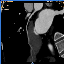

In [196]:
validation_image = image.load_img('/home/telraswa/Desktop/Swapnil/Pallavi/Deep_Learning/validation/45.jpg', target_size = (64, 64))
validation_image


In [197]:
#converting image to numeric matrix 
validation_image = image.img_to_array(validation_image)



In [198]:
validation_image = np.expand_dims(validation_image, axis = 0)
validation_image


array([[[[  0.,  13., 109.],
         [ 69., 117., 193.],
         [ 45., 107., 218.],
         ...,
         [ 37., 130., 233.],
         [ 46., 121., 222.],
         [ 74., 127., 223.]],

        [[ 65., 120., 221.],
         [169., 124.,  57.],
         [ 21.,   1.,   0.],
         ...,
         [ 56.,  37.,  23.],
         [ 37.,  20.,   2.],
         [ 10.,   0.,   0.]],

        [[ 60., 120., 192.],
         [227., 185., 145.],
         [ 14.,   0.,   0.],
         ...,
         [ 68.,  43.,  12.],
         [ 29.,  12.,   0.],
         [230., 188., 138.]],

        ...,

        [[ 56., 126., 221.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[ 56., 126., 221.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[ 59., 125., 221.],
       

In [199]:
result = classifier.predict(validation_image)
result


array([[0.]], dtype=float32)

In [200]:
#finding the indices from train images for different classes
training_set.class_indices


{'Abnormal': 0, 'Normal': 1}

In [201]:
if result[0][0] == 1:
    prediction = 'Normal'
else:
    prediction = 'Abnormal'

In [195]:
#final prediction 
print("Condition of patient is :",prediction)


('Condition of patient is :', 'Abnormal')
